**Dataset Linki**
**https://www.kaggle.com/datasets/kenjee/z-by-hp-unlocked-challenge-3-signal-processing**

**1. Kütüphanelerin Yüklenmesi**

In [1]:
!pip install tensorflow
!pip install tensorflow-gpu
!pip install tensorflow-io
!pip install matplotlib


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [4]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

**2.Veri Yükleme**

In [5]:
CAPUCHIN_FILE=os.path.join('data','Parsed_Capuchinbird_Clips','XC3776-0.wav')
NOT_CAPUCHIN_FILE=os.path.join('data','Parsed_Not_Capuchinbird_Clips','afternoon-birds-song-in-forest-0.wav')

In [6]:
def load_wav_16k_mono(file):
    file_contents=tf.io.read_file(file)
    # Üstte sesi okuyup altta decode ediyor
    wav,sample_rate=tf.audio.decode_wav(file_contents,desired_channels=1)

    wav=tf.squeeze(wav,axis=-1)

    sample_rate=tf.cast(sample_rate,dtype=tf.int64)
    #Sinyal 44100Hzden 16000Hz'e azaltarak datayı azaltıyoruz
    wav=tfio.audio.resample(wav,rate_in=sample_rate,rate_out=16000)
    return wav

**Deneme Yeri**

In [7]:
file_contents=tf.io.read_file(CAPUCHIN_FILE)
file_contents
wav,sample_rate=tf.audio.decode_wav(file_contents,desired_channels=1)
print(wav.shape)
print(sample_rate)
wav=tf.squeeze(wav,axis=-1)
sample_rate=tf.cast(sample_rate,dtype=tf.int64)
wav=tfio.audio.resample(wav,rate_in=sample_rate,rate_out=16000)
wav


(132300, 1)
tf.Tensor(44100, shape=(), dtype=int32)


<tf.Tensor: shape=(48000,), dtype=float32, numpy=
array([ 1.0432389e-06, -3.0215922e-06,  1.9820709e-06, ...,
       -4.5542806e-02, -5.4887902e-02, -8.5778177e-02], dtype=float32)>

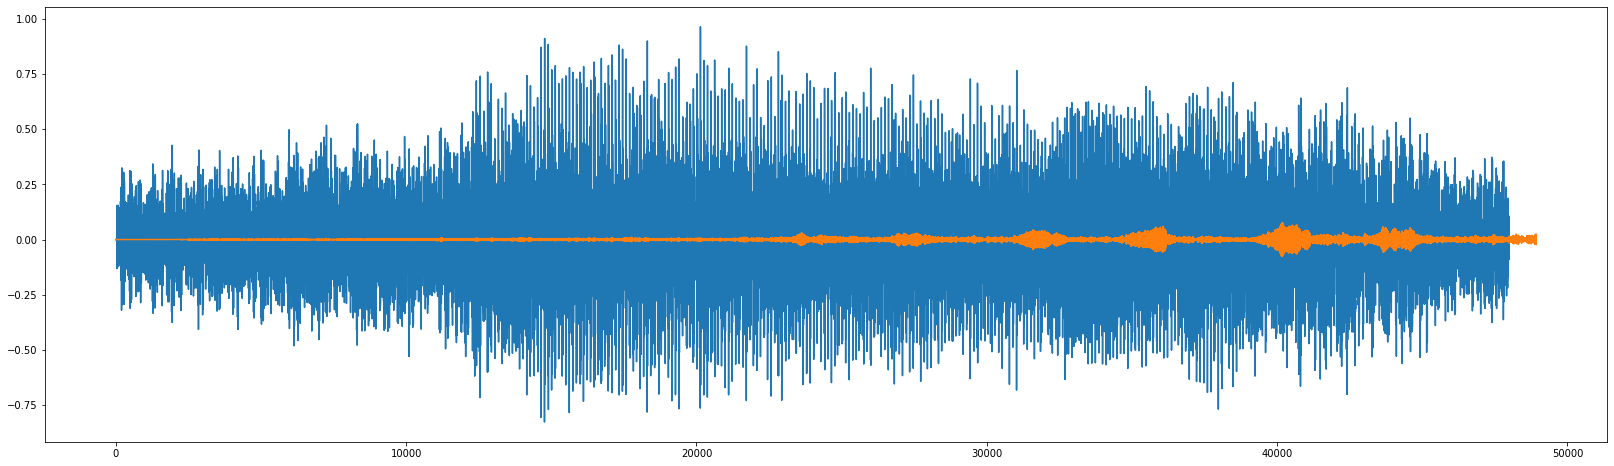

In [8]:
plt.figure(figsize=(28,8))
plt.plot(load_wav_16k_mono(CAPUCHIN_FILE))
plt.plot(load_wav_16k_mono(NOT_CAPUCHIN_FILE))

**3.Spectograma Dönüştürme**

In [9]:
POS=os.path.join('data','Parsed_Capuchinbird_Clips')
NEG=os.path.join('data','Parsed_Not_Capuchinbird_Clips')
pos=tf.data.Dataset.list_files(POS+'/*.wav')
neg=tf.data.Dataset.list_files(NEG+'/*.wav')

pos.as_numpy_iterator().next()

b'data/Parsed_Capuchinbird_Clips/XC22397-7.wav'

In [10]:
positives=tf.data.Dataset.zip((pos,tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives=tf.data.Dataset.zip((neg,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data=positives.concatenate(negatives)
#Denemeler
positives.as_numpy_iterator().next()
negatives.as_numpy_iterator().next()
data.as_numpy_iterator().next()

(b'data/Parsed_Capuchinbird_Clips/XC526106-2.wav', 1.0)

In [11]:
lengths=[]
for f in os.listdir(os.path.join('data','Parsed_Capuchinbird_Clips')):
    tensor_wave=load_wav_16k_mono(os.path.join('data','Parsed_Capuchinbird_Clips',f))
    lengths.append(len(tensor_wave))

In [12]:
lengths

[40000,
 48000,
 56000,
 48000,
 56000,
 64000,
 64000,
 64000,
 56000,
 56000,
 40000,
 56000,
 48000,
 56000,
 64000,
 64000,
 64000,
 56000,
 64000,
 64000,
 56000,
 56000,
 56000,
 56000,
 56000,
 48000,
 48000,
 64000,
 48000,
 64000,
 64000,
 48000,
 56000,
 56000,
 40000,
 64000,
 56000,
 40000,
 32000,
 56000,
 48000,
 56000,
 48000,
 48000,
 48000,
 64000,
 48000,
 64000,
 64000,
 56000,
 56000,
 48000,
 40000,
 48000,
 56000,
 48000,
 40000,
 56000,
 56000,
 56000,
 40000,
 48000,
 48000,
 48000,
 48000,
 72000,
 56000,
 56000,
 56000,
 40000,
 64000,
 64000,
 40000,
 64000,
 56000,
 56000,
 64000,
 64000,
 48000,
 56000,
 48000,
 56000,
 48000,
 56000,
 48000,
 40000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 56000,
 40000,
 64000,
 56000,
 64000,
 56000,
 48000,
 64000,
 56000,
 64000,
 56000,
 64000,
 56000,
 48000,
 64000,
 48000,
 48000,
 56000,
 48000,
 48000,
 48000,
 56000,
 48000,
 64000,
 56000,
 64000,
 64000,
 48000,
 48000,
 48000,
 56000,
 48000,
 55999,


In [13]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [14]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [15]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

In [16]:
print(f'mean: {54156/16000}, min: {32000/16000}, max: {80000/16000}')

mean: 3.38475, min: 2.0, max: 5.0


In [17]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [18]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

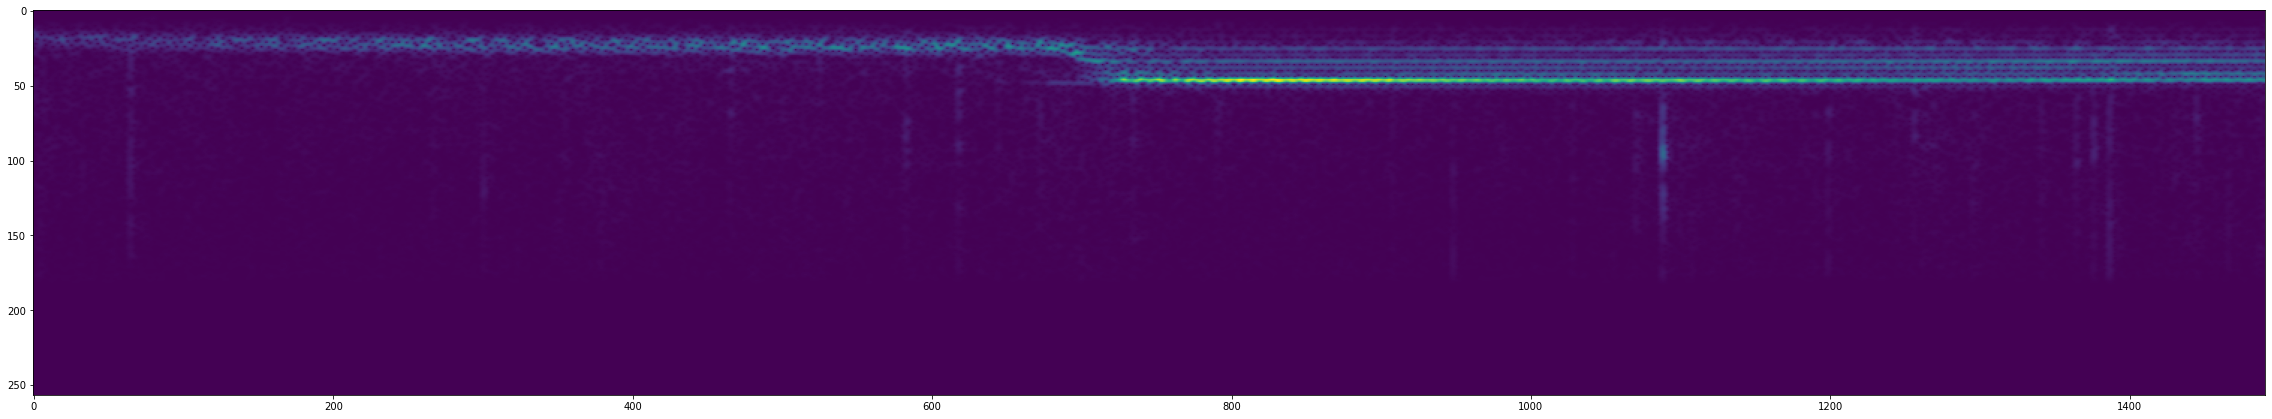

In [19]:
spectrogram, label = preprocess(filepath, label)
plt.figure(figsize=(40,40))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

**4.Eğitim ve Test Ayrıştırması**

In [20]:
data=data.map(preprocess)
data=data.cache()
data=data.shuffle(buffer_size=1000)
data=data.batch(8).prefetch(8)

In [21]:
train=data.take(36)
test=data.skip(36).take(15)

In [22]:
samples,labels=train.as_numpy_iterator().next()
samples.shape

(8, 1491, 257, 1)

In [23]:
print(labels.shape)
labels

(8,)


array([0., 0., 1., 0., 1., 1., 0., 0.], dtype=float32)

**5.Modelin Oluşturulması**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [25]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(1491,257,1)))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [26]:
model.compile(optimizer='Adam',loss='BinaryCrossentropy',metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 16)     160       
                                                                 
 conv2d_1 (Conv2D)           (None, 1487, 253, 16)     2320      
                                                                 
 flatten (Flatten)           (None, 6019376)           0         
                                                                 
 dense (Dense)               (None, 64)                385240128 
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 385,242,673
Trainable params: 385,242,673
Non-trainable params: 0
_________________________________________________________________


In [28]:
history=model.fit(train,epochs=4,validation_data=test)

Epoch 1/4
36/36 [==============================] - 290s 8s/step - loss: 8.9762 - recall: 0.8642 - precision: 0.7527 - val_loss: 0.0247 - val_recall: 0.9655 - val_precision: 0.9655
Epoch 2/4
36/36 [==============================] - 269s 7s/step - loss: 0.4007 - recall: 0.8889 - precision: 0.9114 - val_loss: 0.0360 - val_recall: 0.9167 - val_precision: 1.0000
Epoch 3/4
36/36 [==============================] - 264s 7s/step - loss: 0.0416 - recall: 0.9747 - precision: 1.0000 - val_loss: 0.0337 - val_recall: 1.0000 - val_precision: 0.9677
Epoch 4/4
36/36 [==============================] - 305s 9s/step - loss: 0.0058 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0017 - val_recall: 1.0000 - val_precision: 1.0000


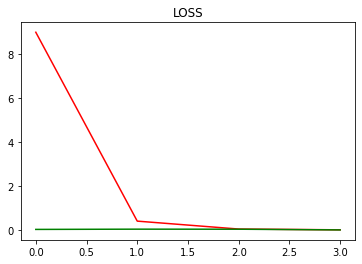

In [30]:
plt.title('LOSS')
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.show()

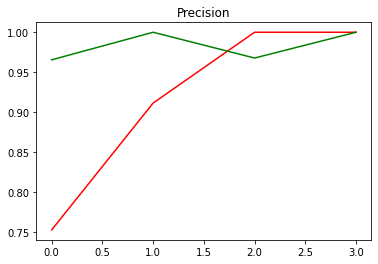

In [32]:
plt.title('Precision')
plt.plot(history.history['precision'],'r')
plt.plot(history.history['val_precision'],'g')
plt.show()

**6.Tahmin**

In [33]:
X_test,y_test=test.as_numpy_iterator().next()

In [34]:
X_test.shape

(8, 1491, 257, 1)

In [35]:
tahmin=model.predict(X_test)

In [36]:
tahmin = [1 if prediction > 0.5 else 0 for prediction in tahmin]

In [37]:
print(tahmin)
y_test.astype(int)

[0, 0, 0, 0, 1, 0, 0, 0]


array([0, 0, 0, 0, 1, 0, 0, 0])

In [38]:
model.save('model.h5')

In [39]:
!ls

 data							        main.ipynb
'Disco Diffusion v5.1 [w  Turbo] adlı not defterinin kopyası'   model.h5
